In [ ]:
# Installing packages used to sort data by month and week_days
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-cp36-none-any.whl size=3438 sha256=1ae6142f107c3aeed3abeafe31b8daccc70ff07fa9b3aaa114a5a981f45e1660
  Stored in directory: /root/.cache/pip/wheels/4c/35/02/083a8cdd13de15416e153a50324450c15189d259c861f9f964
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-cp36-none-any.whl size=3237 sha256=17c4bda6c681273aa6f49fe3bcfeb284e101c2c7eabec25c7cfe9669e7d0321c
  Stored in directory: /root/.cache/pip/wheels/11/2f/19/05e3f8e6a6d06a2e962f0a172bc9736451f6518e2db6d1ab6d
Successfully built sorted-months-weekdays


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

from subprocess import check_output
from tqdm.notebook import tqdm
import plotly.graph_objs as go
import plotly.offline as py
import datetime
from sort_dataframeby_monthorweek import *
import calendar
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Fetching Data

#### Downloading Data (Using Wget)

In [ ]:
if not os.path.exists("favorita-grocery-sales-forecasting.zip"):
    !wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7391/44328/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1592818548&Signature=epxm3qqaZNvmhd1gH6aLwMG6cDcgTJqYgEYlPzZzt1orzCqfjdI1LbHAQNG6M2BLlRofkMzrooLGCVwF%2Bj%2BzKXOqg1cMM8KlGjoCTg%2FMRO8mB9vyMoQ0292uPA0RDKj1925p2Zw8To3v7rKbdk2%2BHi3vhJn9zxrcDpdjnYsABYM4EUcp%2FVQwZrG2q1Oyunn7VUFf0p382sFuy1JMzprsVSjPbFBeugiBwB0CwhnhdcQmHI%2B2QplVXiB6e9yQwddRIHIR%2BPO8woKtMFiv08OJu9ZLX4G9ZgJEWZmnmALihONmjx2Pff1wgSySyXax2Iagd97STSD1l0AJ0iRQFevVkQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dfavorita-grocery-sales-forecasting.zip" -c -O 'favorita-grocery-sales-forecasting.zip'
else:
    print("File Already Present")

--2020-06-20 00:19:52--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/7391/44328/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1592818548&Signature=epxm3qqaZNvmhd1gH6aLwMG6cDcgTJqYgEYlPzZzt1orzCqfjdI1LbHAQNG6M2BLlRofkMzrooLGCVwF%2Bj%2BzKXOqg1cMM8KlGjoCTg%2FMRO8mB9vyMoQ0292uPA0RDKj1925p2Zw8To3v7rKbdk2%2BHi3vhJn9zxrcDpdjnYsABYM4EUcp%2FVQwZrG2q1Oyunn7VUFf0p382sFuy1JMzprsVSjPbFBeugiBwB0CwhnhdcQmHI%2B2QplVXiB6e9yQwddRIHIR%2BPO8woKtMFiv08OJu9ZLX4G9ZgJEWZmnmALihONmjx2Pff1wgSySyXax2Iagd97STSD1l0AJ0iRQFevVkQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dfavorita-grocery-sales-forecasting.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 480014675 (458M) [application/zip]
Saving to: ‘favorita-grocery-sales-forecasting.z

#### Extracting zip files

In [ ]:
!unzip '/content/favorita-grocery-sales-forecasting.zip'

Archive:  /content/favorita-grocery-sales-forecasting.zip
  inflating: holidays_events.csv.7z  
  inflating: items.csv.7z            
  inflating: oil.csv.7z              
  inflating: sample_submission.csv.7z  
  inflating: stores.csv.7z           
  inflating: test.csv.7z             
  inflating: train.csv.7z            
  inflating: transactions.csv.7z     


In [ ]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


In [ ]:
!p7zip -d '/content/train.csv.7z'
!p7zip -d '/content/stores.csv.7z'
!p7zip -d '/content/items.csv.7z'
!p7zip -d '/content/transactions.csv.7z'
!p7zip -d '/content/oil.csv.7z'
!p7zip -d '/content/holidays_events.csv.7z'
!p7zip -d '/content/test.csv.7z'


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 474092593 bytes (453 MiB)

Extracting archive: /content/train.csv.7z
--
Path = /content/train.csv.7z
Type = 7z
Physical Size = 474092593
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      0% - train.csv                  1% - train.csv                  2% - train.csv                  3% - train.csv                  4% - train.csv                  5% - train.csv                  6% - train.csv                  7% - train.csv

### Memory Functions

In [ ]:
#Function for calculating memory usage of dataframe
def memory_usage(df):
    memory=round(df.memory_usage(index=True).sum(),3)
    return memory/ 1024**2

In [ ]:
# Reference: https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of Dataframe is {:.3f} MB'.format(start_mem))
    
    for col in tqdm(df.columns):
        col_type = df[col].dtype
        
        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.3f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

### EDA on Train Dataset

Infering Datatypes from Test Data

In [ ]:
#Reading test.csv
df_test = pd.read_csv('test.csv')
df_test.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [ ]:
#Reducing memory usage of test dataframe
df_test=reduce_mem_usage(df_test)

Memory usage of Dataframe is 106.073 MB



Memory usage after optimization is: 38.573 MB
Decreased by 63.6%


In [ ]:
#storing optimized datatypes of test dataframe to load train dataframe
dtypes_dict=dict(df_test.dtypes)

del dtypes_dict['date'],dtypes_dict['onpromotion']
del df_test

Reading Train File

In [ ]:
df_train = pd.read_csv('train.csv', parse_dates=['date'],dtype=dtypes_dict)  #using optimized datatypes of test dataframe to load train dataframe.

print("Memory used by Train Dataframe --> %.3f"%memory_usage(df_train),"MB")

Memory used by Train Dataframe --> 3949.549 MB


In [ ]:
#Reducing memory usage of train dataframe
df_train=reduce_mem_usage(df_train)

Memory usage of Dataframe is 3949.549 MB



Memory usage after optimization is: 2633.033 MB
Decreased by 33.3%


In [ ]:
print("No. of  Datapoints --> {}\n No. of Features --> {}".format(*df_train.shape))
df_train.head()

No. of  Datapoints --> 125497040
 No. of Features --> 6


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


Features :
1. Date 
2. Store Number (Integers representing different stores)
3. Item Number (Integers representing different stores)
4. On Promotion (Logical feature, Telling whether the particular item sold had been assigned a special promotion pricing at the time in the specific store. This feature contains many NA values.)

Target Variable --> Unit Sales (i.e. how many units of the specific item were sold in that store on that day. Negative values mean that this particular item was returned)

#### Checking Missing values

In [ ]:
def find_nan_values(df):
    if df.isnull().values.any():
        null_columns=df.columns[df.isnull().any()].tolist()
        for column in null_columns:
            total_values=df.shape[0]
            null_values=df[column].isnull().sum()
            print("No. of Nan Values in '{}' column --> {}".format(column,null_values))
            print("{:.2f} % of Total values".format((100 * null_values) / total_values))
            print("\n")
    else:
        print("No Column has Nan Values")


In [ ]:
#Checking which columns have Nan values
find_nan_values(df_train)

No. of Nan Values in 'onpromotion' column --> 21657651
17.26 % of Total values




In [ ]:
#Changing type of promotion column to float
df_train['onpromotion']=df_train['onpromotion'].astype(float)
#Missing values filled with -1
df_train['onpromotion'] = df_train['onpromotion'].fillna(np.int(-1))

#### Unit sales of Each Store

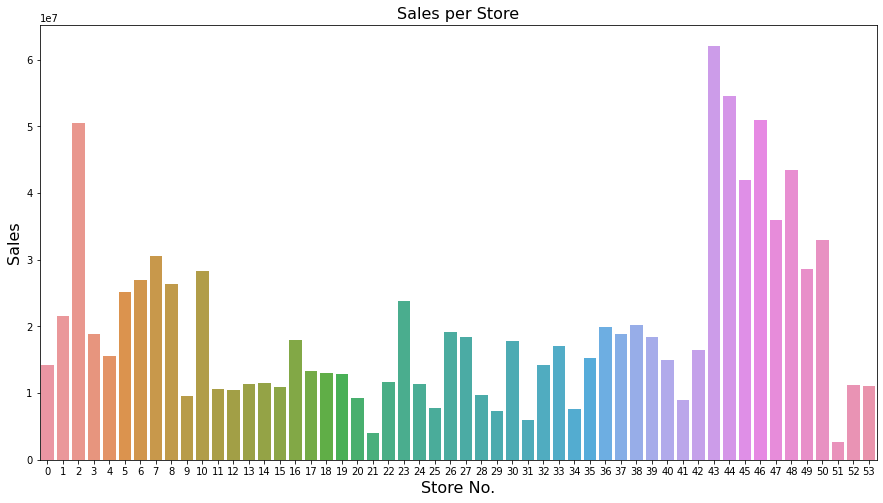

In [ ]:
# Group By store_nbr and Sum of unit_sales for each store_nbr
x = df_train.groupby(['store_nbr'],as_index=False).agg({'unit_sales':'sum'}) 

#PLotting store_nbr Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.barplot(x = x.index, y= "unit_sales", data = x)
plt.title('Sales per Store',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.xlabel('Store No.',fontsize=16)
plt.show()





* The store numbers range from 1 to 54.
* Store No. 44 has the maximum sales.

*   Store No. 52 has the minimum sales.



#### Unit sales of Each Item

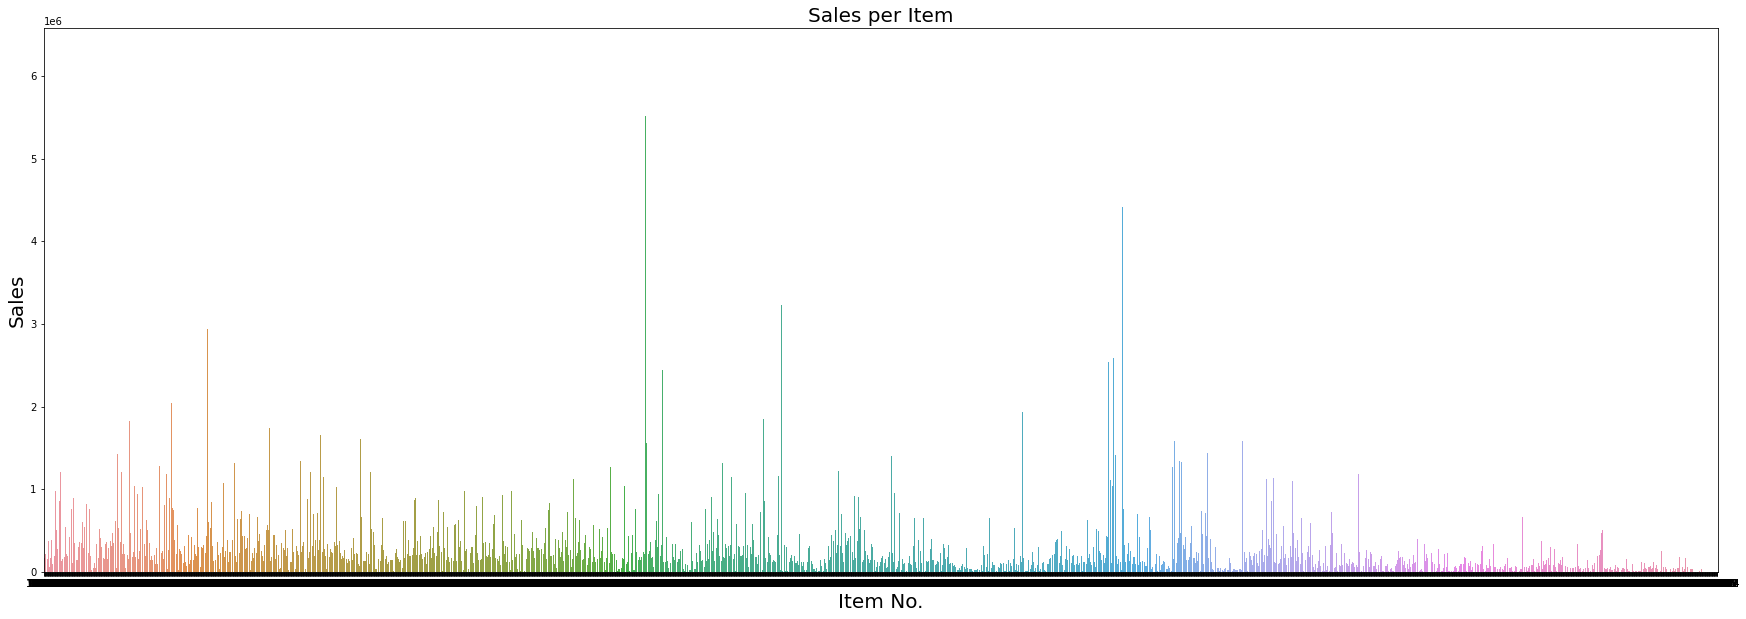

In [ ]:
# Group By item_nbr and Sum of unit_sales for each item_nbr
x = df_train.groupby(['item_nbr'], as_index=False).agg({'unit_sales':'sum'}) 

#Plotting item_nbr Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
ax = sns.barplot(x = x.item_nbr, y= "unit_sales", data = x)
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
plt.title('Sales per Item',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.xlabel('Item No.',fontsize=20)
plt.show()




*  Only few items have very high sales.
*  Variation can be seen in sales for different item no.'s 



#### Sales per Year

In [ ]:
# Adding Year as a Feature
df_train["year"]=df_train["date"].dt.year

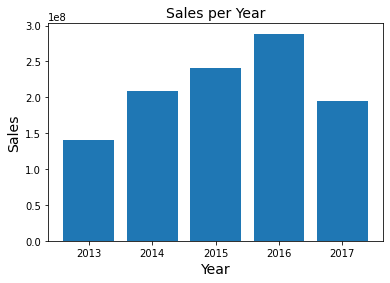

In [ ]:
# Group By Year and Sum of unit_sales for each year
x = df_train.groupby(['year'], as_index=False).agg({'unit_sales':'sum'})

#Plotting year Vs unit_sales
plt.bar(x.year, x.unit_sales)
plt.title('Sales per Year',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.show()

del x



*    Given Sales Data is from 2013 to 2017.
*   Sales are increasing each year except 2017.



In [ ]:
# Viewing Data only for 2017
df_train[df_train["date"].dt.year==2017]

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year
101688779,101688779,2017-01-01,25,99197,1.0,0.0,2017
101688780,101688780,2017-01-01,25,103665,7.0,0.0,2017
101688781,101688781,2017-01-01,25,105574,1.0,0.0,2017
101688782,101688782,2017-01-01,25,105857,4.0,0.0,2017
101688783,101688783,2017-01-01,25,106716,2.0,0.0,2017
...,...,...,...,...,...,...,...
125497035,125497035,2017-08-15,54,2089339,4.0,0.0,2017
125497036,125497036,2017-08-15,54,2106464,1.0,1.0,2017
125497037,125497037,2017-08-15,54,2110456,192.0,0.0,2017
125497038,125497038,2017-08-15,54,2113914,198.0,1.0,2017



* The reason behind decrease in sales in 2017 is that 2017 only has records till 15th of August. 

#### Sales per Month for Every Year

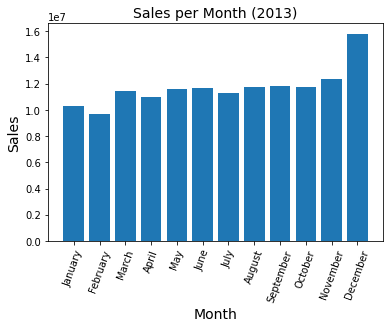

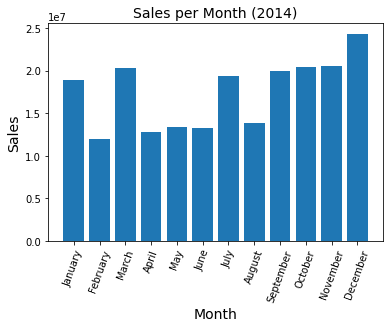

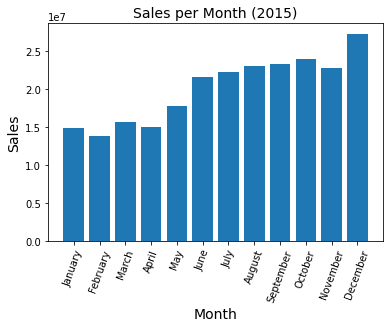

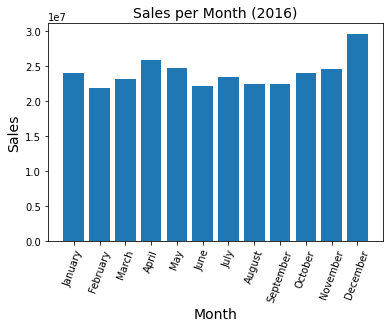

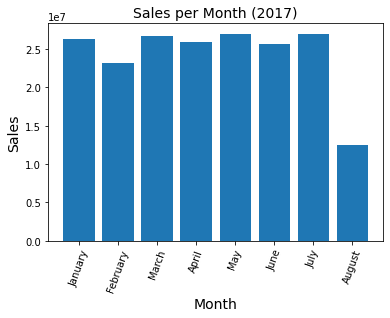

In [ ]:
for year in df_train["date"].dt.year.unique():
    #Filtering data for specific year
    x = df_train[df_train["date"].dt.year == year]

    #Extracting month name from date
    x['month']=x['date'].dt.month_name()

    #Grouping data by months and adding unit_sales
    x=x.groupby(['month'], as_index=False).agg({'unit_sales':'sum'})
    
    #Sorting dataframe by Month
    x = Sort_Dataframeby_Month(df=x,monthcolumnname='month')

    #Plotting month Vs unit_sales for every year
    #plt.figure(figsize=(12,8))
    plt.bar(x.month, x.unit_sales)
    plt.xticks(rotation=70)
    plt.title("Sales per Month ("+str(year)+")",fontsize=14)
    plt.ylabel('Sales',fontsize=14)
    plt.xlabel('Month',fontsize=14)
    plt.show()
    del x


*  December month has the maximum sales every year 
( which makes sense because of the Christmas and holiday season.) 

*  February month has the minimum sales every year.


*  This confirms that the sales vary with the 'Date' and there is a seasonality factor present in the data.



Note: Sales data for year 2017 is only till 15th of August.

#### Filtering 2016 Data

Number of rows are more than 125 million in the Train data, 
Only the data for 2016 would be explored further.
Assuming that each year has similar distributions.

In [ ]:
#Filtering data having year = 2016 only
df_2016=df_train[df_train["date"].dt.year==2016]
del df_train

#### Sales per Day of Week

In [ ]:
#Adding Day of Week as a Feature
df_2016['day_of_week'] = df_2016['date'].dt.day_name()

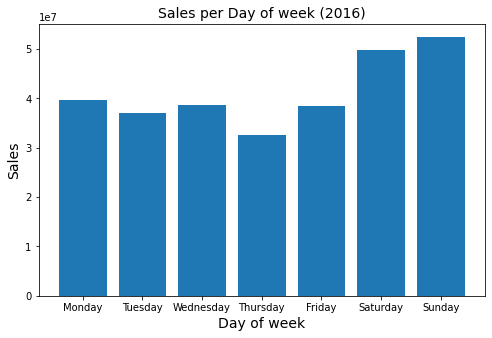

In [ ]:
# Group By day_of_week and Sum of unit_sales for each day_of_week
x = df_2016.groupby(['day_of_week'], as_index=False).agg({'unit_sales':'sum'})

#Sorting Dataframe by Week_day
x = Sort_Dataframeby_Weekday(df=x,Weekdaycolumnname='day_of_week')

#Plotting day_of_week Vs unit_sales
plt.figure(figsize=(8,5))
plt.bar(x.day_of_week, x.unit_sales)
plt.title('Sales per Day of week (2016)', fontsize= 14)
plt.xlabel('Day of week', fontsize= 14)
plt.ylabel('Sales', fontsize= 14)

del x


* Sunday has the maximum sales followed by Saturday (i.e. Weekends seem to be prefered as compared to Weekdays to shop at this supermaket.)
* Thursday has the least sales. 
*   Day of Week can be used as a feature to predict sales

#### No. of Items on promotion

In [ ]:
#Pie plot showing information about promotion column
pie_perish_trace = go.Pie(
    labels = ['Not-on_Promotion','on_Promotion'], 
    values = df_2016.onpromotion.value_counts().values,
    text=['Not-on_Promotion','on_Promotion'],
    hoverinfo="label+value",
    domain = dict(x=[0, 0.48], y=[0.5, 1]),
    showlegend = False
)

item_pie_layout = dict(
    width=800, height=700,
    title="Percentage of items on Promotion "
)

pie_perish_fig = go.Figure(data=pie_perish_trace, layout=item_pie_layout)
py.iplot(pie_perish_fig)

del pie_perish_trace,pie_perish_fig



* Small fraction of items are on promotion 
* Majority of items are not on promotion.

Note : This plot is using 2016 data only, some of the values are Nan for previous years. i.e Whole training data has 17.3 % of items for which the information is not known (i.e Nan). 





#### Sales for on promotion/not on promotion Items

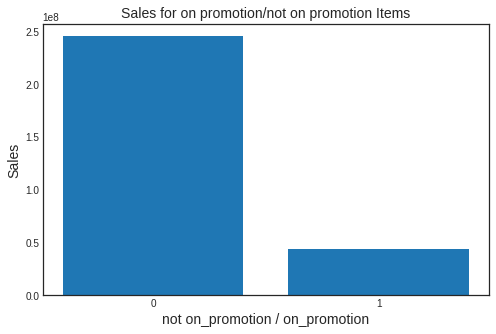

In [89]:
# Group By day_of_week and Sum of unit_sales for each day_of_week
x = df_2016.groupby(['onpromotion'], as_index=False).agg({'unit_sales':'sum'})

#Plotting day_of_week Vs unit_sales
plt.figure(figsize=(8,5))
plt.bar(x.onpromotion, x.unit_sales)
plt.title('Sales for on promotion/not on promotion Items', fontsize= 14)
plt.xticks((0,1))
plt.xlabel('not on_promotion / on_promotion', fontsize= 14)
plt.ylabel('Sales', fontsize= 14)

del x

* Sales for Items Not on Promotion are higher (as there are very few items on promotion)

### EDA On Stores Dataset

In [ ]:
#Reading stores.csv
df_stores = pd.read_csv('stores.csv')
print("Memory used by Stores Dataframe --> %.3f"%memory_usage(df_stores),"MB")
df_stores.head()

Memory used by Stores Dataframe --> 0.002 MB


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


#### Checking Missing Values

In [ ]:
#Checking which columns have Nan values
find_nan_values(df_stores)

No Column has Nan Values


#### No of Stores per State

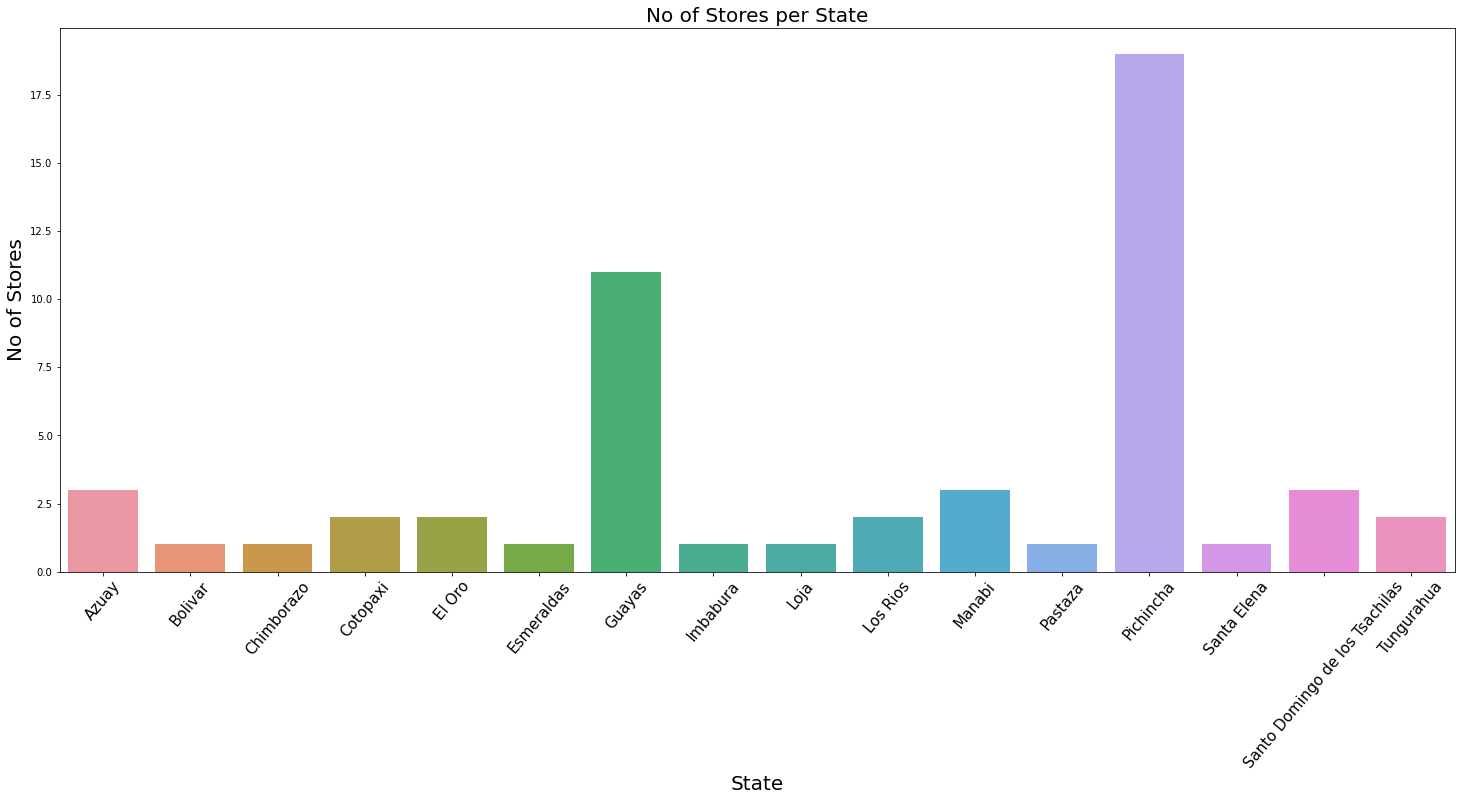

In [ ]:
#Fetching no.of stores in each state
x=df_stores.state.value_counts().to_frame()

#Plotting state Vs no.of stores
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
ax = sns.barplot(x = x.index, y= "state",data=x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 50, fontsize = 15)
plt.title('No of Stores per State',fontsize=20)
plt.ylabel('No of Stores',fontsize=20)
plt.xlabel('State',fontsize=20)

plt.show()

del x

*  Pichincha has maximum no. of stores i.e 19 stores,followed by Guayas with 11 stores

* Other States have no. of stores between 1 and 3.




#### Sales per State

In [ ]:
#Merging store dataframe with sales dataframe
store_sales_2016=df_2016.merge(df_stores, how='inner', on='store_nbr')
store_sales_2016=reduce_mem_usage(store_sales_2016)

store_sales_2016.head()

Memory usage of Dataframe is 1915.078 MB



Memory usage after optimization is: 1276.719 MB
Decreased by 33.3%


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,day_of_week,city,state,type,cluster
0,66458908,2016-01-01,25,105574,12.0,0.0,2016,Friday,Salinas,Santa Elena,D,1
1,66458909,2016-01-01,25,105575,9.0,0.0,2016,Friday,Salinas,Santa Elena,D,1
2,66458910,2016-01-01,25,105857,3.0,0.0,2016,Friday,Salinas,Santa Elena,D,1
3,66458911,2016-01-01,25,108634,3.0,0.0,2016,Friday,Salinas,Santa Elena,D,1
4,66458912,2016-01-01,25,108701,2.0,1.0,2016,Friday,Salinas,Santa Elena,D,1


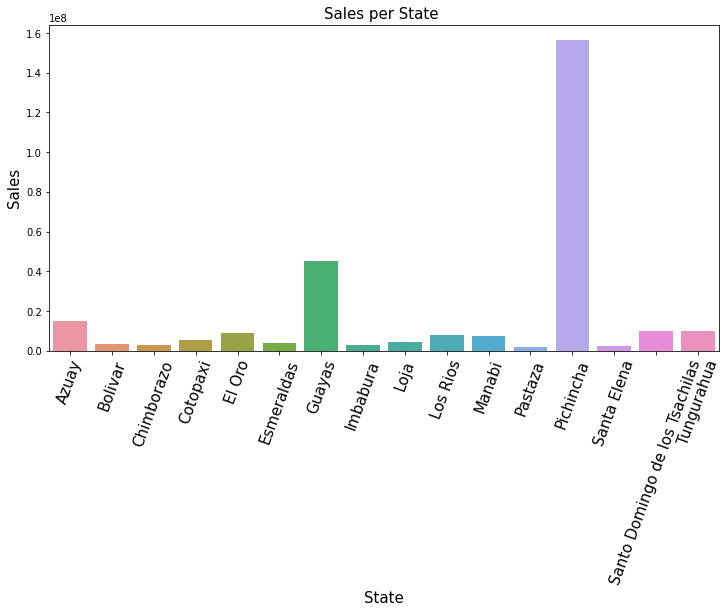

In [ ]:
#Group by state and sum of sales for each state
x = store_sales_2016.groupby(['state'], as_index=False).agg({'unit_sales':'sum'}) 

#Plotting state Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax = sns.barplot(x = x.state, y= "unit_sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 15)
plt.title("Sales per State ",fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.show()

del x

*  Pichincha has maximum sales (as it has max no. of stores  stores) followed by Guayas.
* Other States have much lower sales.
* States shows a certain amount of variation in the average sale numbers.



#### No of Stores per City

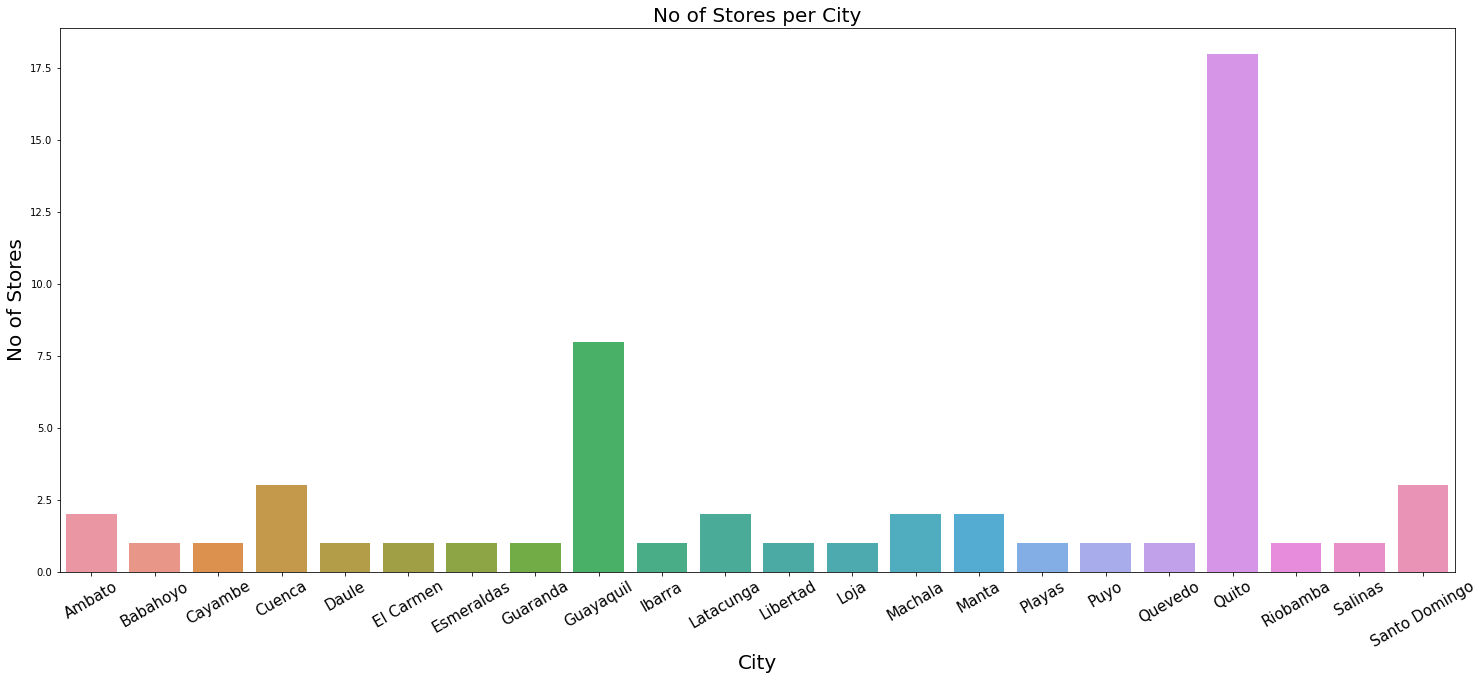

In [ ]:
#Fetching no.of stores in each city
x=df_stores.city.value_counts().to_frame()

#Plotting city Vs no.of stores
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
ax = sns.barplot(x = x.index, y= "city",data=x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, fontsize = 15)
plt.title('No of Stores per City',fontsize=20)
plt.xlabel('City',fontsize=20)
plt.ylabel('No of Stores',fontsize=20)
plt.show()

del x



*  Quito has maximum no. of stores i.e. 18 stores followed by
Guayaquil with 8 stores

*  Most of the Cities have 1 to 3 no. of stores




#### Sales per City

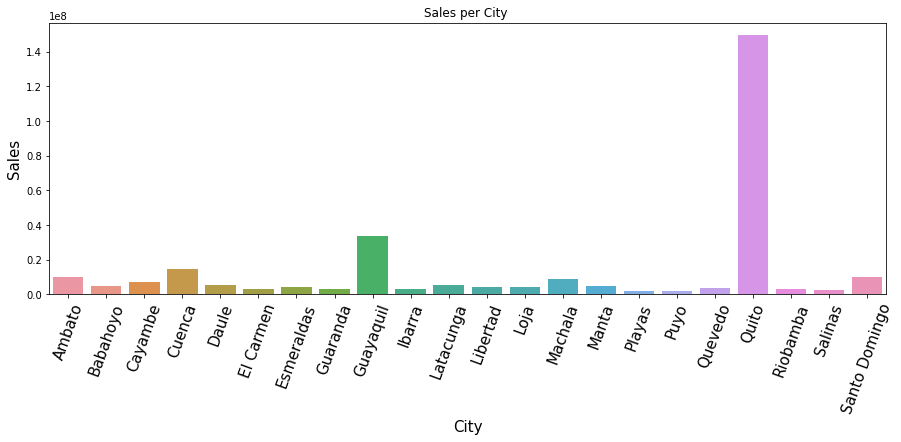

In [ ]:
#Group by city and sum of sales for each city
x = store_sales_2016.groupby(['city'], as_index=False).agg({'unit_sales':'sum'}) 

#Plotting city Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax = sns.barplot(x = x.city, y= "unit_sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 15)
plt.title("Sales per City ")
plt.ylabel('Sales',fontsize=15)
plt.xlabel('City',fontsize=15)
plt.show()




*  Quito has maximum sales overall (as it has the maximum no. of stores)
* Cities shows a certain amount of variation in the average sale numbers.



#### No of Stores per Store Type

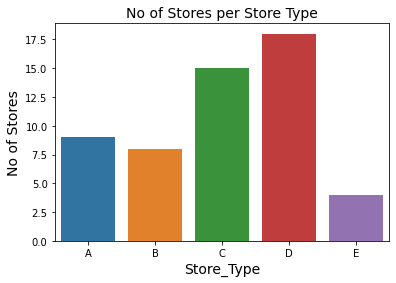

In [ ]:
#Fetching no of stores for each store type
x=df_stores.type.value_counts().to_frame()

#Plotting  store type Vs no.of stores
fig, ax = plt.subplots()
ax = sns.barplot(x = x.index, y= "type",data=x)
plt.title("No of Stores per Store Type",fontsize=14)
plt.xlabel('Store_Type',fontsize=14)
plt.ylabel('No of Stores',fontsize=14)
plt.show()



*  Among the types, we see that D and “C” are the most frequent, with “A” and “B” having similar medium frequency and “E” only accounting for 4 stores.



*  Type D has maximum no. of stores followed by C.
*  Type E has minimum no. of stores.



#### Sales per Store Type

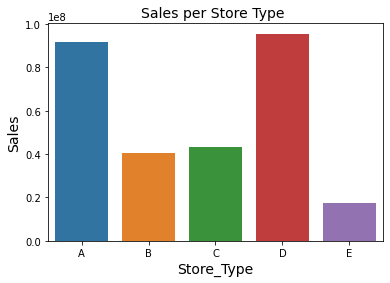

In [ ]:
#Group by store type and sum of sales for each type
x = store_sales_2016.groupby(['type'], as_index=False).agg({'unit_sales':'sum'}) 

#Plotting store type Vs unit_sales
fig, ax = plt.subplots()
ax = sns.barplot(x = x.type, y= "unit_sales", data = x)
plt.title("Sales per Store Type ",fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Store_Type',fontsize=14)
plt.show()




* Types A and D have much higher sales as compared to other Types. But Type A has approx. 1/2 no. of stores as compared to Type D which means Type A stores could be bigger in size or could be in prime location

*  Type E has minimum sales (as it has minimum no. of stores )



#### No of Stores per Cluster

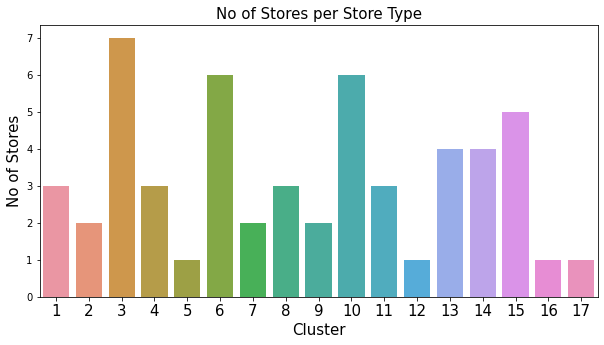

In [ ]:
#Fetching no of stores for each store cluster
x=df_stores.cluster.value_counts().to_frame()

#Plotting store cluster Vs no.of stores
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.barplot(x = x.index, y= "cluster",data=x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 15)
plt.title("No of Stores per Store Type",fontsize=15)
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('No of Stores',fontsize=15)
plt.show()


* 54 unique stores and these are clustered into 17 
unique groups
* Cluster no. 3 has maximum no. of stores followed by 6 and 10.



#### Sales per Cluster

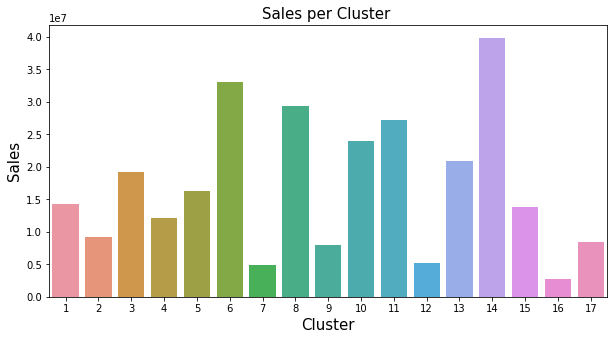

In [ ]:
#Group by store cluster and sum of sales for each cluster
x = store_sales_2016.groupby(['cluster'], as_index=False).agg({'unit_sales':'sum'}) 

#Plotting store cluster Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.barplot(x = x.cluster, y= "unit_sales", data = x)
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 15)
plt.title("Sales per Cluster ",fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('Cluster',fontsize=15)
plt.show()




*   Cluster 14 has maximum sales.
*   Cluster 16 has minimum sales.
*   The cluster feature shows a clear variation in sales numbers.


In [ ]:
del df_stores,store_sales_2016

### EDA on Items Dataset

In [ ]:
#Reading items.csv
df_items = pd.read_csv('items.csv')
print("Memory used by Items Dataframe --> %.3f"%memory_usage(df_items),"MB")
df_items.head()

Memory used by Items Dataframe --> 0.125 MB


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


#### Checking Missing Values

In [ ]:
#Checking which columns have Nan values
find_nan_values(df_items)

No Column has Nan Values


#### No of Items per Item Family

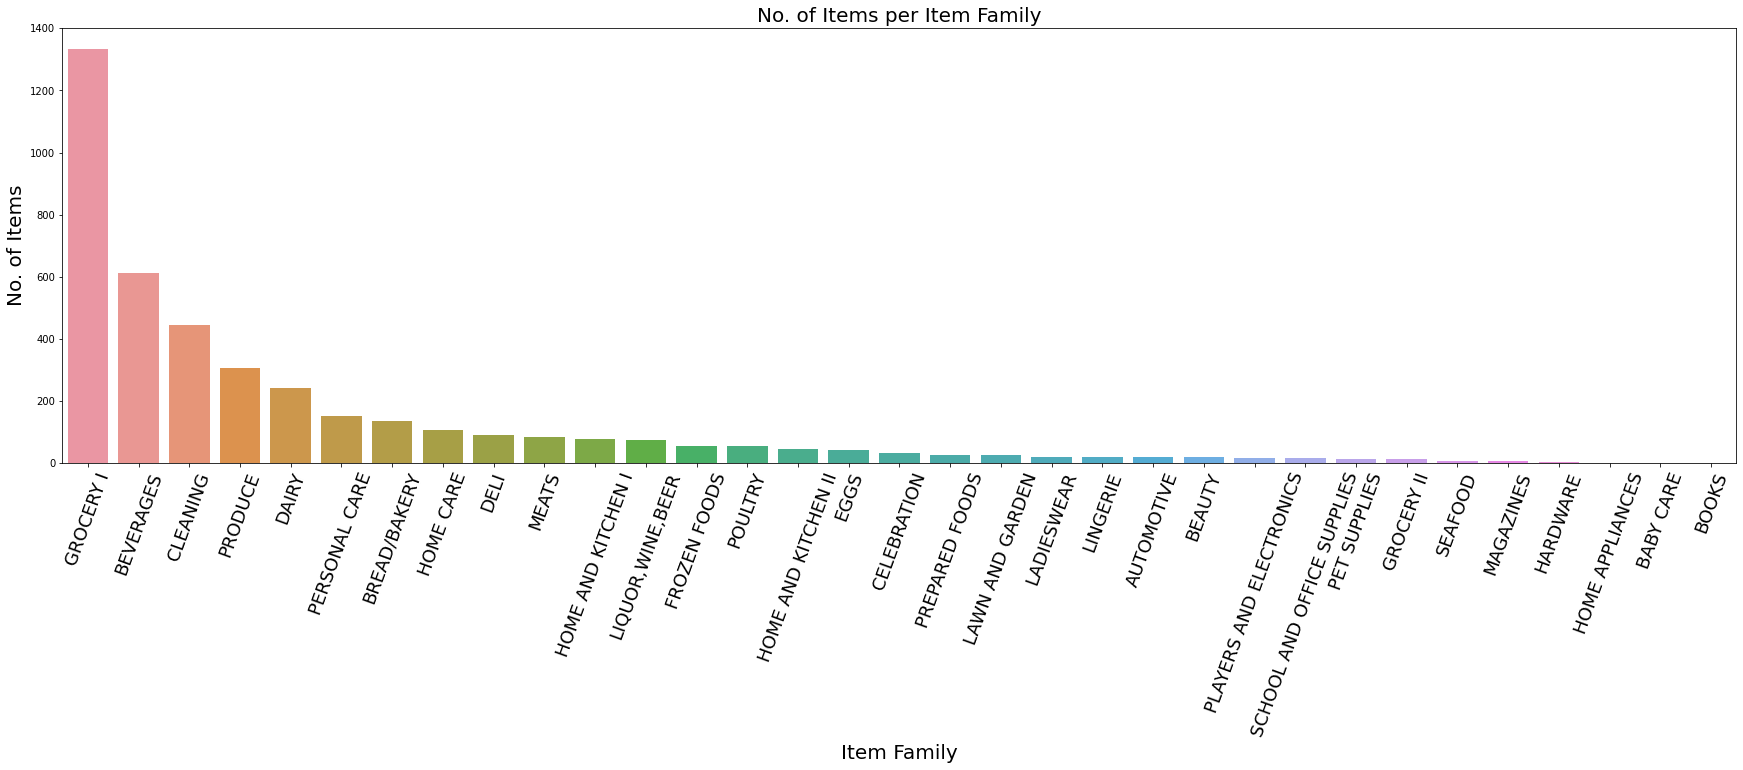

In [ ]:
#Fetching no.of items in each item family
x=df_items.family.value_counts().to_frame()

#Plotting item family Vs no.of items
fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
ax = sns.barplot(x = x.index, y= "family", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 18)
plt.ylabel('No. of Items', fontsize= 20)
plt.xlabel('Item Family', fontsize= 20)
plt.title('No. of Items per Item Family',fontsize= 20)
plt.show()


* Grocery I has the maximum no. of items followed by Beverages and Cleaning .
* Some of the Families such as Home Appliances, Baby Care, Books has almost no items.





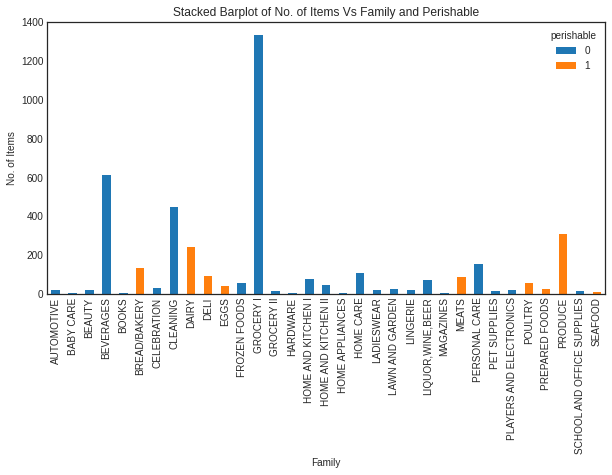

In [ ]:
#Group by family and perishable feature 
x = df_items.groupby(['family', 'perishable']).size()

#Plotting stacked barplot family and perishable feature Vs no. of items
plt.style.use('seaborn-white')
x.unstack().plot(kind='bar',stacked=True, figsize=(10,5),  grid=False)
plt.title('Stacked Barplot of No. of Items Vs Family and Perishable')
plt.xlabel('Family')
plt.ylabel('No. of Items')
plt.show()

del x


* No family contains both perishable and non-perishable items, which means we can directly map an item's family to its perishability. 




#### Sales per Item Family

In [ ]:
#Merging items dataframe and sales dataframe
item_sales_2016=df_2016.merge(df_items, how='inner', on='item_nbr')
item_sales_2016=reduce_mem_usage(item_sales_2016)

item_sales_2016.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable
0,66458908,2016-01-01,25,105574,12.0,0.0,GROCERY I,1045,0
1,66460627,2016-01-02,1,105574,2.0,0.0,GROCERY I,1045,0
2,66462416,2016-01-02,2,105574,1.0,0.0,GROCERY I,1045,0
3,66464630,2016-01-02,3,105574,12.0,0.0,GROCERY I,1045,0
4,66467202,2016-01-02,4,105574,2.0,0.0,GROCERY I,1045,0


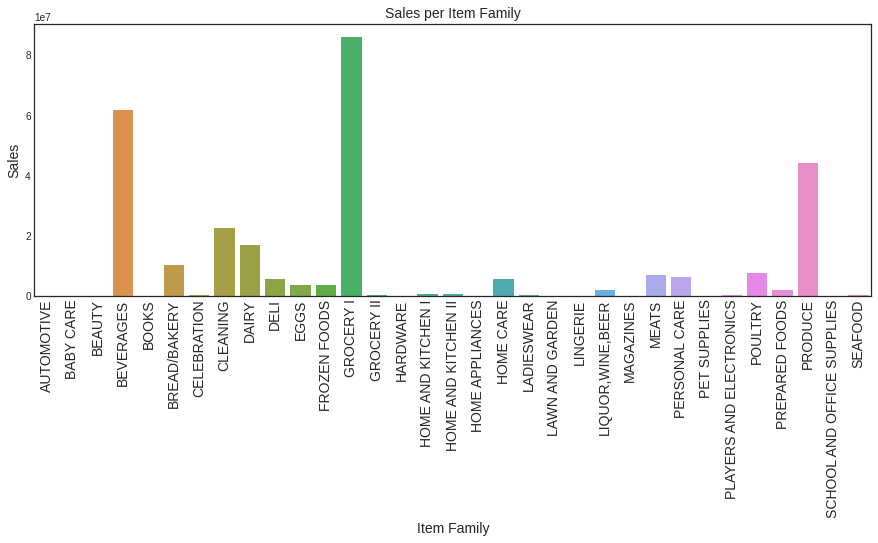

In [ ]:
#Group by item family and sum of sales for each item family
x = item_sales_2016.groupby(['family'], as_index=False).agg({'unit_sales':'sum'}) 

#Plotting item family Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax = sns.barplot(x = x.family, y= "unit_sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 100, fontsize = 14)
plt.ylabel('Sales', fontsize= 14)
plt.xlabel('Item Family', fontsize= 14)
plt.title('Sales per Item Family',fontsize= 14)
plt.show()

del x



*  GROCERY I is the best selling family (as it has max. no. of items)
*   Item family shows variation in sales number




#### No. of Items per Item Class

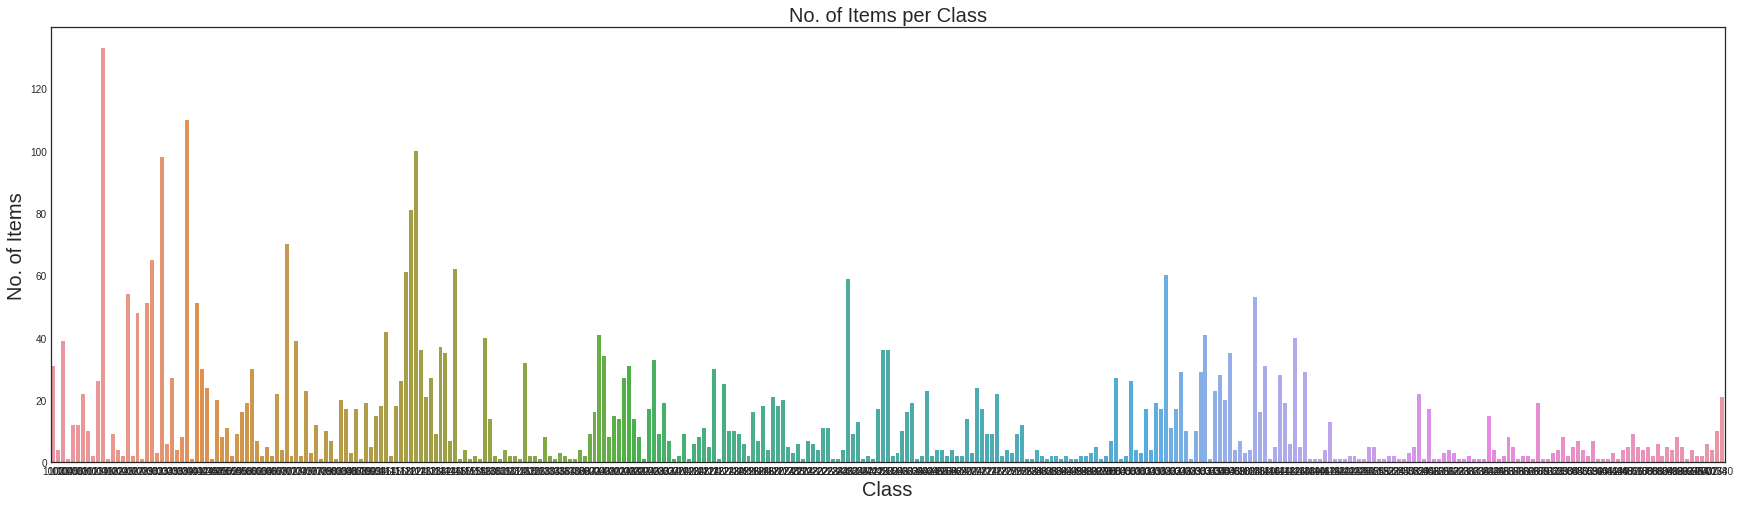

In [ ]:
#Fetching no.of items in each item class
x=df_items['class'].value_counts().to_frame()

#Plotting item class Vs no.of items 
fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
ax = sns.barplot(x = x.index, y= "class", data = x)
plt.title('No. of Items per Class',fontsize= 20)
plt.xlabel('Class', fontsize= 20)
plt.ylabel('No. of Items', fontsize= 20)
plt.show()



*   The class feature has a large number of levels
*  Item class shows variation in no. of items







#### Sales per Item Class

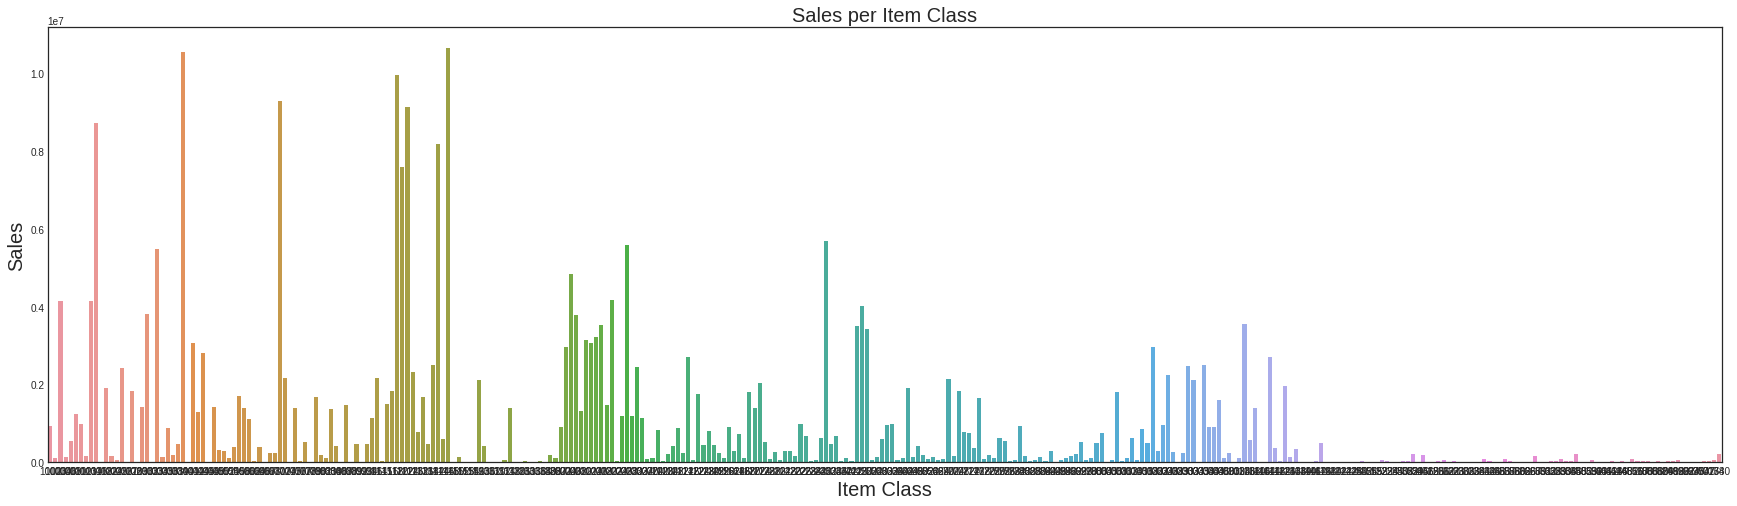

In [ ]:
#Group by item class and sum of sales for each item class
x = item_sales_2016.groupby(['class'], as_index=False).agg({'unit_sales':'sum'}) 

#Plotting item_class Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
ax = sns.barplot(x = x['class'], y= "unit_sales", data = x)
plt.ylabel('Sales', fontsize= 20)
plt.xlabel('Item Class', fontsize= 20)
plt.title('Sales per Item Class',fontsize= 20)
plt.show()



*   Item class shows certain amount of variation in sale numbers.



#### No. of Items Perishable/Non-Perishable

In [ ]:
#Pie plot of no. of items Vs perishable or not i.e. 0 or 1
x = go.Pie(
    labels = ['non-perishable', 'perishable'], 
    values = df_items.perishable.value_counts().values,
    marker=dict(colors=["#3498DB", "#F39C12"]),
    text=['non-perishable','perishable'],
    hoverinfo="label+value",
    domain = dict(x=[0, 0.48], y=[0.5, 1]),
    showlegend = False
)

item_pie_layout = dict(
    width=800, height=700,
    title="Percentage of perishable items "
)

x = go.Figure(data=x, layout=item_pie_layout)
py.iplot(x)


*  We can see that more non-perishable item exists in the dataset.

* About 1/4 of all items are perishable. This  will have a  impact our prediction models, because good predictions of perishable items are rewarded with a bonus ( i.e Items marked as perishable have a score weight of 1.25; otherwise, the weight is 1.0)








#### Sales for Perishable/Non-Perishable Items

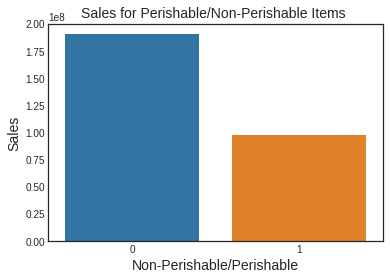

In [ ]:
#Group by perishable feature and sum of sales for each type of perishable i.e. 0 or 1
x = item_sales_2016.groupby(['perishable'], as_index=False).agg({'unit_sales':'sum'}) 

#Plotting perishable or not  Vs unit_sales
fig, ax = plt.subplots()
ax = sns.barplot(x = x.perishable, y= "unit_sales", data = x)
plt.ylabel('Sales', fontsize= 14)
plt.xlabel('Non-Perishable/Perishable', fontsize= 14)
plt.title('Sales for Perishable/Non-Perishable Items ',fontsize= 14)
plt.show()


*  Non-perishable items have higher sales than perishable items (as the most sold item family is Grocery I which has non-perishable items)


In [ ]:
del item_sales_2016 ,df_items

### EDA on Transactions Data

In [ ]:
#Reading transactions.csv
df_transactions = pd.read_csv('transactions.csv',parse_dates=['date'])
print("Memory used by Transactions Dataframe --> %.3f"%memory_usage(df_transactions),"MB")
df_transactions.head()

Memory used by Transactions Dataframe --> 1.911 MB


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


#### Checking Missing Values

In [ ]:
#Checking which columns have Nan values
find_nan_values(df_transactions)

No Column has Nan Values


#### No. of transactions per Month for Every Year

In [ ]:
import calendar
#Adding year , month and day of week as features
df_transactions["year"] = df_transactions["date"].dt.year
df_transactions["month"] = df_transactions["date"].dt.month
df_transactions['day_of_week'] = df_transactions['date'].dt.day_name()


df_transactions["year"] = df_transactions["year"].astype(str)
df_transactions.head()


,date,store_nbr,transactions,year,month,day_of_week
0,2013-01-01,25,770,2013,1,Tuesday
1,2013-01-02,1,2111,2013,1,Wednesday
2,2013-01-02,2,2358,2013,1,Wednesday
3,2013-01-02,3,3487,2013,1,Wednesday
4,2013-01-02,4,1922,2013,1,Wednesday


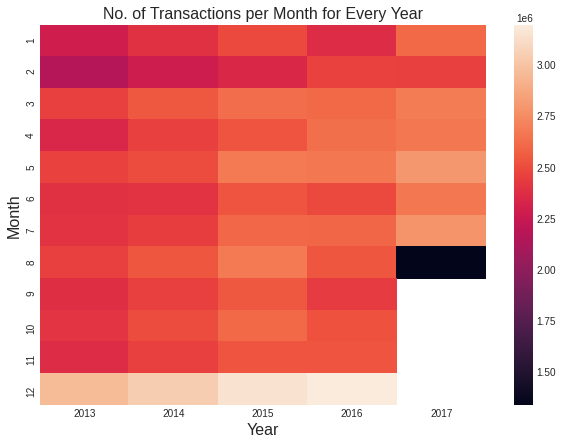

In [ ]:
# Group by month, year and sum of transactions
x = df_transactions.groupby(['month', 'year'], as_index=False).agg({'transactions':'sum'})

#Plotting heat map of month , year and no. of transactions
y = x.pivot("month", "year", "transactions")
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(y)
plt.xlabel('Year', fontsize= 16)
plt.ylabel('Month', fontsize= 16)
plt.title("No. of Transactions per Month for Every Year",fontsize= 16)
plt.show()

del x






*  December has the most transactions for all years 
*  With passing years, the squares are getting lighter, which indicates that the no. of transactions are increasing each year.

Note : Since we don´t have data after 15th August 2017 those squares appear blank.



#### No. of transactions per Day of Week for Every Year

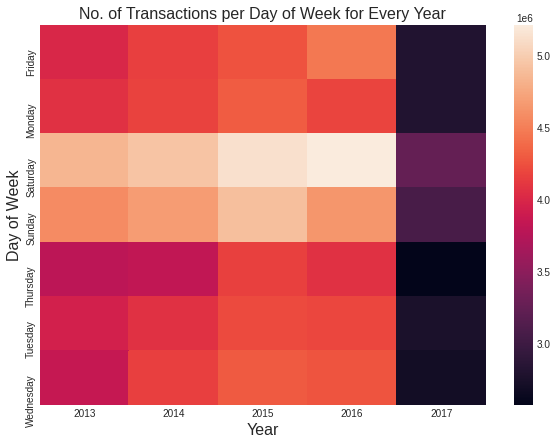

In [ ]:
# Group by day_of_week, year and sum of transactions
x = df_transactions.groupby(['day_of_week', 'year'], as_index=False).agg({'transactions':'sum'})

#Plotting heat map of day_of_week , year and no. of transactions
y = x.pivot("day_of_week", "year", "transactions")
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(y)
plt.xlabel('Year', fontsize= 16)
plt.ylabel('Day of Week', fontsize= 16)
plt.title("No. of Transactions per Day of Week for Every Year",fontsize= 16)

del x


* Saturday has the maximum no. of transactions followed by Saturday (i.e. Weekends seem to be prefered as compared to Weekdays to shop at this supermaket.)
* Saturday has more transactions than Sunday, But Sunday has higher sales than Saturday which means customers return products on Saturday.

Note : Year 2017 does not have 4 months of data, thats's why it appears that 2017 is performing worse as compared to other years.


#### No. of transactions per Store

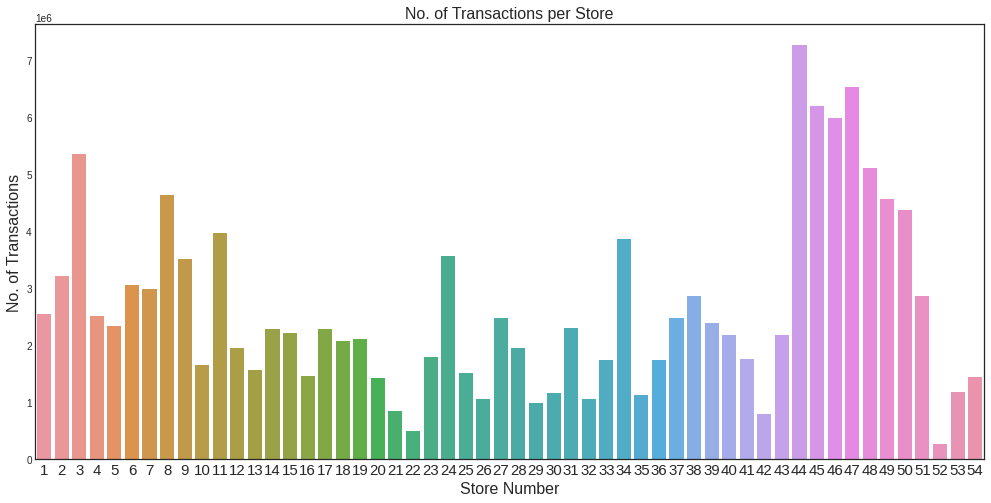

In [ ]:
# Group by store_nbr and sum of transactions for each store_nbr
x = df_transactions.groupby(['store_nbr'], as_index=False).agg({'transactions':'sum'})


fig, ax = plt.subplots()
fig.set_size_inches(17, 8)
ax = sns.barplot(x = x.store_nbr, y= x.transactions)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 15)
plt.title('No. of Transactions per Store',fontsize= 16)
plt.ylabel('No. of Transactions', fontsize= 16)
plt.xlabel('Store Number', fontsize= 16)
plt.show()

*   Store No. 44 has the maximum no. of transactions.
*   Store No. 52 has the minimum no. of transactions.


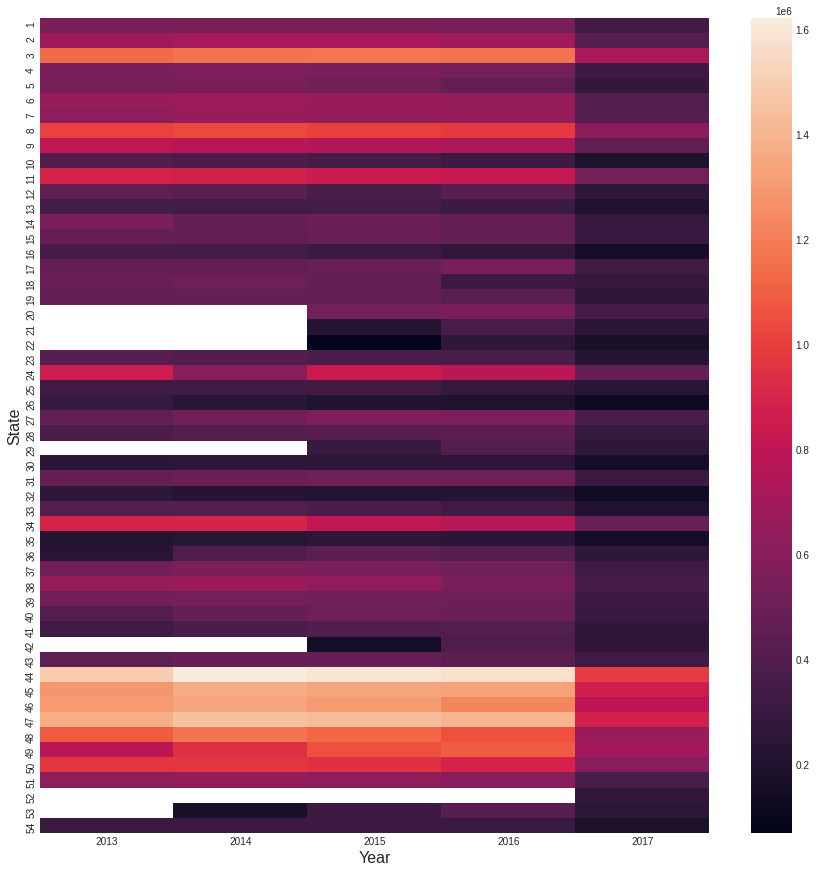

In [ ]:
# Group by store_nbr, year and sum of transactions
x = df_transactions.groupby(['store_nbr', 'year'], as_index=False).agg({'transactions':'sum'})

#Plotting heat map of store_nbr , year and no. of transactions
y = x.pivot("store_nbr", "year", "transactions")
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(y)
plt.xlabel('Year', fontsize= 16)
plt.ylabel('State', fontsize= 16)
plt.show()

* White boxes for store no. 20, 21, 22, 42 etc. shows that the particular store was not opened in that particular year (as there are no transactions).
* New Stores are opened yearly (for ex. store no. 42 was opened in year 2015 and store no. 53 was opened in year 2017 )

#### No. of Transactions per State for Every Year 

In [ ]:
#Merging transactions dataframe and stores dataframe
transactions_store = pd.merge(df_transactions, df_stores, on='store_nbr')
transactions_store.head()


,date,store_nbr,transactions,year,month,day_of_week,city,state,type,cluster
0,2013-01-01,25,770,2013,1,Tuesday,Salinas,Santa Elena,D,1
1,2013-01-02,25,1038,2013,1,Wednesday,Salinas,Santa Elena,D,1
2,2013-01-03,25,887,2013,1,Thursday,Salinas,Santa Elena,D,1
3,2013-01-04,25,1054,2013,1,Friday,Salinas,Santa Elena,D,1
4,2013-01-05,25,1355,2013,1,Saturday,Salinas,Santa Elena,D,1


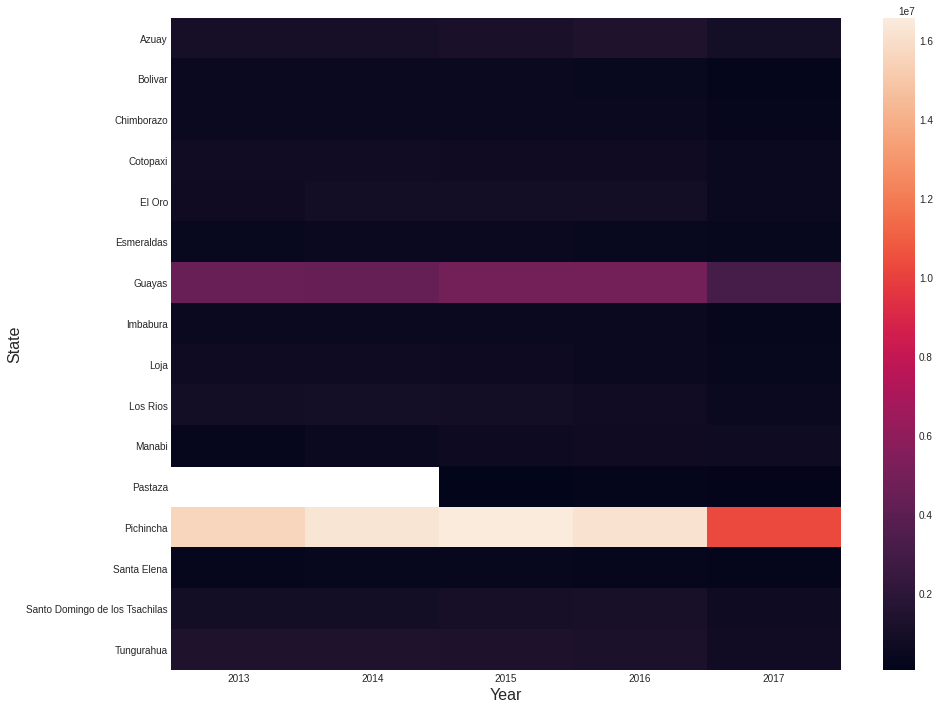

In [ ]:
# Group by state, year and sum of transactions
x = transactions_store.groupby(['state', 'year'], as_index=False).agg({'transactions':'sum'})

#Plotting heat map of state , year and no. of transactions
y = x.pivot("state", "year", "transactions")
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(y)
plt.xlabel('Year', fontsize= 16)
plt.ylabel('State', fontsize= 16)
plt.show()

* Pichincha State has maximum no. of transactions for all years followed by Guayas.
* Pastaza State did not have any stores in year 2013 and 2014

### EDA On Holidays_events Dataset

In [ ]:
#Reading holidays_events.csv
df_holidays_events = pd.read_csv('holidays_events.csv',parse_dates=['date'])
print("Memory used by Holidays_events Dataframe --> %.3f"%memory_usage(df_holidays_events),"MB")
df_holidays_events.head()

Memory used by Holidays_events Dataframe --> 0.014 MB


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


#### Checking Missing Values 

In [ ]:
#Checking which columns have Nan values
find_nan_values(df_holidays_events)

No Column has Nan Values


#### No. of Holidays per Locale

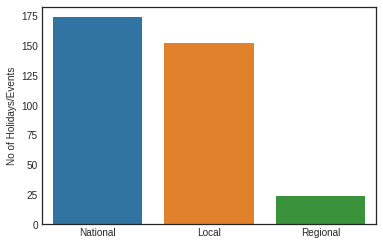

In [ ]:
#Fetching no.of days for each locale 
holidays=df_holidays_events.locale.value_counts().to_frame()

##Plotting Locale Vs no_of_days
fig, ax = plt.subplots()
ax = sns.barplot(x = holidays.index, y= "locale",data=holidays)
plt.title('No of Holidays/Events per Locale',fontsize=14)
plt.xlabel('Locale',fontsize=14)
plt.ylabel('No of Holidays/Events',fontsize=14)
plt.show()

* Most no. of Holidays/Events are National followed by Local.


#### Sales per Locale

In [59]:
#Merging sales and holidays dataframe
holiday_sales_2016=df_2016.merge(df_holidays_events, how='inner', on='date')

holiday_sales_2016=reduce_mem_usage(holiday_sales_2016)

holiday_sales_2016.head()

Memory usage of Dataframe is 551.520 MB



Memory usage after optimization is: 291.522 MB
Decreased by 47.1%


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,type,locale,locale_name,description,transferred
0,66458908,2016-01-01,25,105574,12.0,0.0,Holiday,National,Ecuador,Primer dia del ano,0.0
1,66458909,2016-01-01,25,105575,9.0,0.0,Holiday,National,Ecuador,Primer dia del ano,0.0
2,66458910,2016-01-01,25,105857,3.0,0.0,Holiday,National,Ecuador,Primer dia del ano,0.0
3,66458911,2016-01-01,25,108634,3.0,0.0,Holiday,National,Ecuador,Primer dia del ano,0.0
4,66458912,2016-01-01,25,108701,2.0,1.0,Holiday,National,Ecuador,Primer dia del ano,0.0


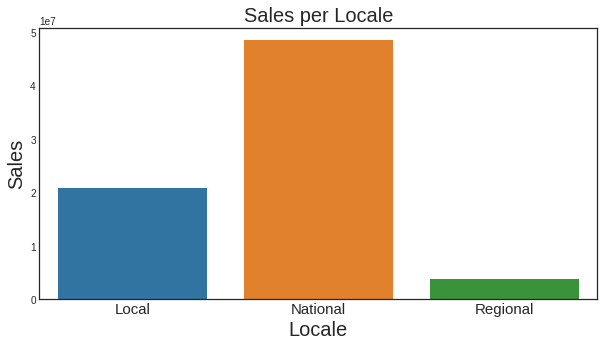

In [60]:
#Group by locale and sum of sales for each locale
x = holiday_sales_2016.groupby(['locale'], as_index=False).agg({'unit_sales':'sum'}) 

#Plotting locale Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.barplot(x = x.locale, y= "unit_sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 15)
plt.ylabel('Sales', fontsize= 20)
plt.xlabel('Locale', fontsize= 20)
plt.title('Sales per Locale',fontsize= 20)
plt.show()

* Maximum sales happens on National Holidays/Events followed Local Holidays/Events

#### No. of Holidays per Locale Name

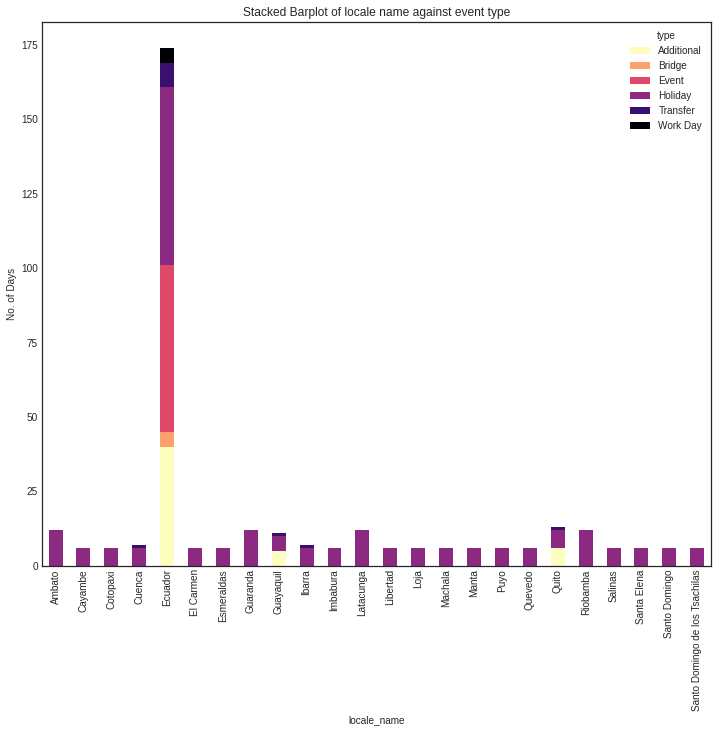

In [62]:
#Group by locale_name,type
x = df_holidays_events.groupby(['locale_name', 'type']).size()

#Plotting stacked barplot of Locale_name and type Vs no_of_days
x.unstack().plot(kind='bar',stacked=True, colormap= 'magma_r', figsize=(12,10),  grid=False)
plt.title('Stacked Barplot of locale name against event type')
plt.ylabel('No. of Days')
plt.show()

* Ecuador have most no. of holidays/events of all types.
* Most locales have similar no. and type of holidays

#### Sales per Locale Name

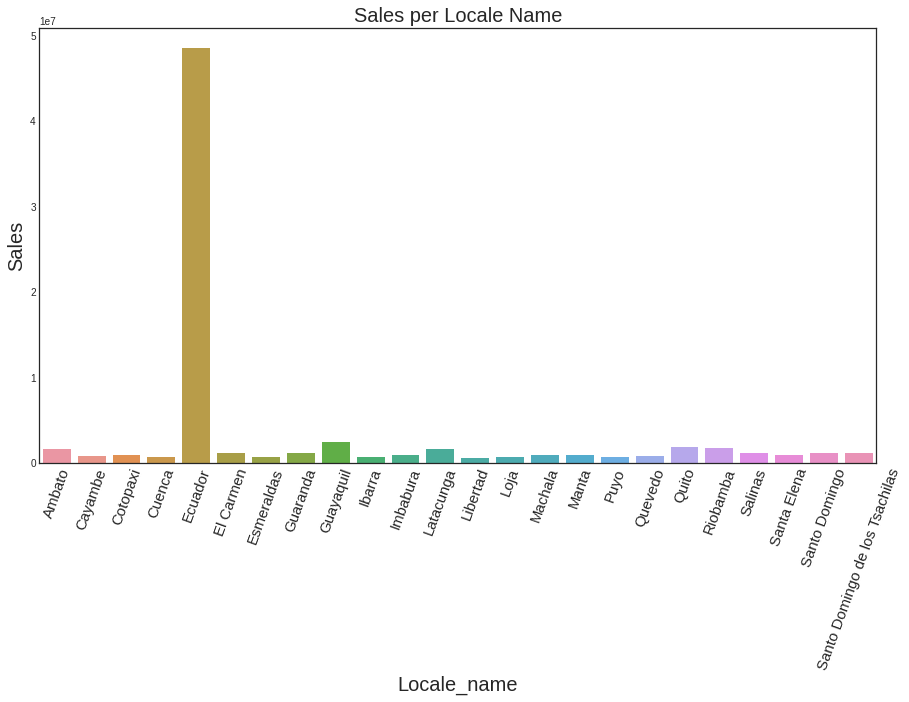

In [63]:
#Group by locale_name and sum of sales for each locale_name
x = holiday_sales_2016.groupby(['locale_name'], as_index=False).agg({'unit_sales':'sum'}) 

#Plotting locale_name Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.barplot(x = x.locale_name, y= "unit_sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 15)
plt.ylabel('Sales', fontsize= 20)
plt.xlabel('Locale_name', fontsize= 20)
plt.title('Sales per Locale Name',fontsize= 20)
plt.show()

* Ecuador has maximum sales.
* Most locales have similar sales.

#### No. of Days per Type

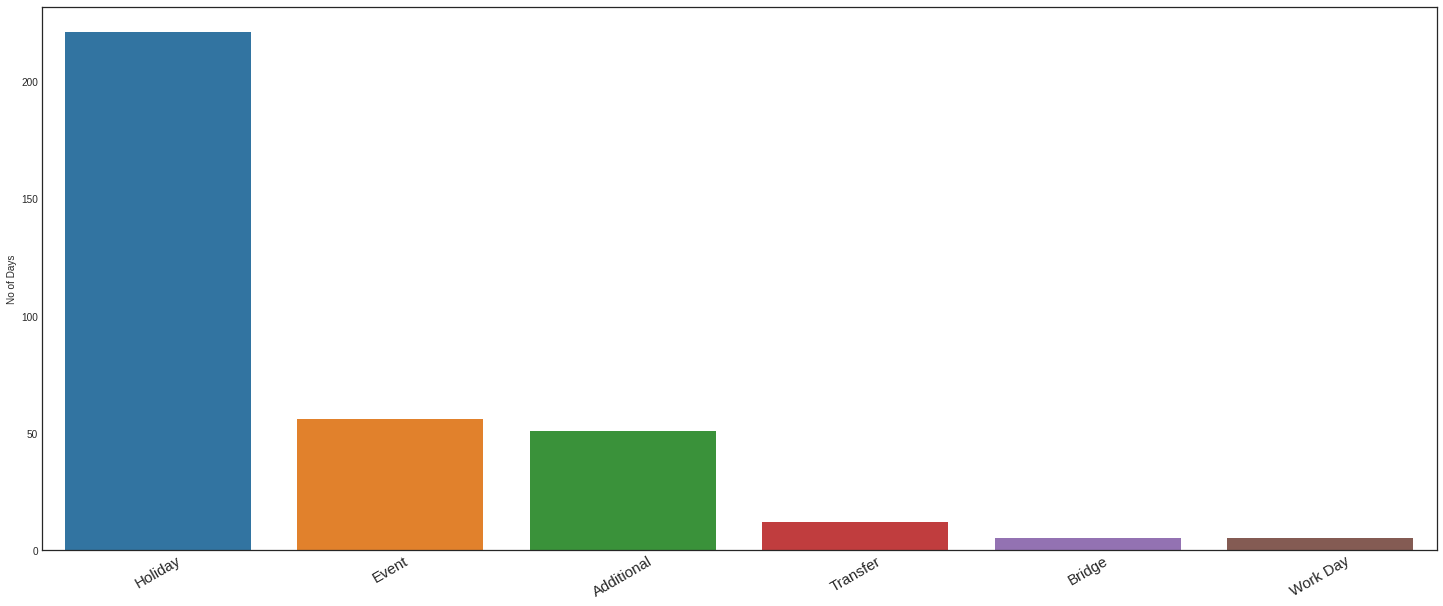

In [64]:
#Fetching no.of days for each holiday type
holidays = df_holidays_events.type.value_counts().to_frame()

#Plotting holiday type Vs no_of_days
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
ax = sns.barplot(x = holidays.index, y= "type",data=holidays)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, fontsize = 15)
plt.ylabel('No of Days')
plt.show()

*  Most no. of special days are of type Holiday.
* Bridge type and Work Day type has equal number of days.As bridge is extra holiday that are added to get a long break weekend. And those holiday needed to be pay back by 'Work Day'.
* The transfer type means officially that day is not a holiday, but some holiday is transferred to that day. (Those whose 'transferred' is true. )

#### Sales per Type

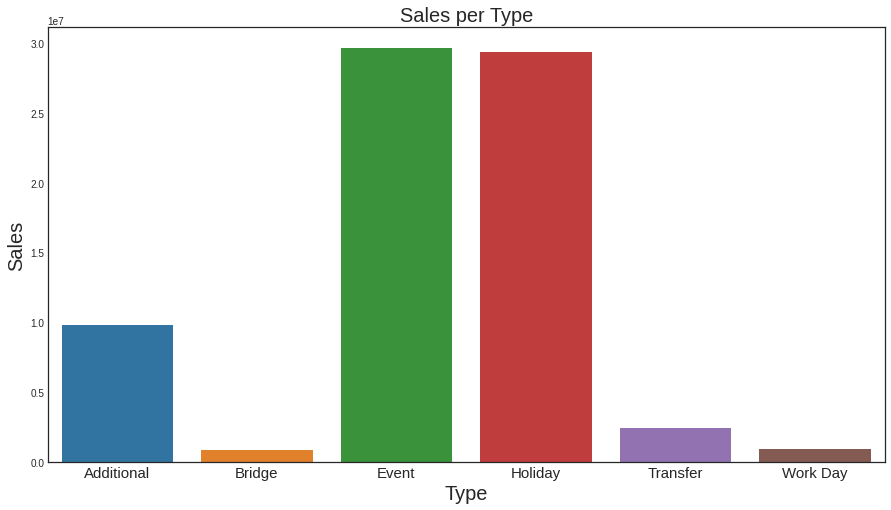

In [65]:
#Group by holiday type  and sum of unit_sales for each holiday type
x = holiday_sales_2016.groupby(['type'], as_index=False).agg({'unit_sales':'sum'}) 

#Plotting holiday type Vs unit_sales
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.barplot(x = x.type, y= "unit_sales", data = x)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 15)
plt.ylabel('Sales', fontsize= 20)
plt.xlabel('Type', fontsize= 20)
plt.title('Sales per Type',fontsize= 20)
plt.show()

* Special Days of type Holiday and Event have higher sales as compared to other types.
* Bridge and Work day have lowest Sales

#### No. of Holidays Transferred/Non-Transferred

In [68]:
#Pie plot showing information about transferred column

x=go.Pie( labels = df_holidays_events.transferred.value_counts().index,
    values = df_holidays_events.transferred.value_counts().values,
    domain = dict(x=[0.52, 1], y=[0.51, 1]),
    showlegend = False,
    text = ['False', 'True'],
    hoverinfo="text+percent",
    textinfo="text+value",
    hole = 0.3
)

holiday_layout = dict(
    width=800, height=800,
    annotations= [
        
        
        dict(
            font=dict(
                size=15,
                family="Droid Sans"
            ),
            text = "Transferred",
            x = 0.82, y=0.78,
            showarrow=False
        )
        
        
    ]
)
x = go.Figure(data=x,layout = holiday_layout)

py.iplot(x)



*  The majority of holidays/events are not transferred.

* The transfer type means officially that day is not a holiday, but some holiday is transferred to that day. (Those whose 'transferred' is true. ) Therefore, 12 holiday have 'transferred' as true, and 12 holiday has 'type' as 'transfer'.

#### Sales for Transferred/Non-Transferred Holidays

In [69]:
# Changing datatype of transferred column to integer
holiday_sales_2016['transferred']=holiday_sales_2016['transferred'].astype(int)

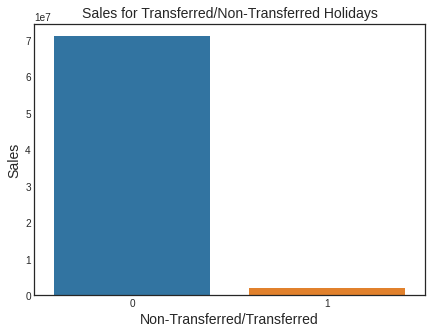

In [71]:
#Group by transferred feature and sum of unit_sales for each transferred type i.e. 0 or 1
x = holiday_sales_2016.groupby(['transferred'], as_index=False).agg({'unit_sales':'sum'}) 
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax = sns.barplot(x = x.transferred, y= "unit_sales", data = x)
plt.ylabel('Sales', fontsize= 14)
plt.xlabel('Non-Transferred/Transferred', fontsize= 14)
plt.title('Sales for Transferred/Non-Transferred Holidays',fontsize= 14)
plt.show()

* Sales for non-transferred days are high(as no. of non-transferred days are far more than transferred days)

### EDA on Oil Dataset

This dataset contains the daily oil price, since ecuador is an oil dependent, and we are trying to understand about sales, which has to do something with economics.

In [72]:
#Read oil.csv
df_oil = pd.read_csv('oil.csv',parse_dates=['date'])
print("Memory used by Oil Dataframe --> %.3f"%memory_usage(df_oil),"MB")
df_oil.head()

Memory used by Oil Dataframe --> 0.019 MB


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


#### Checking Missing Values

In [73]:
#Checking which columns have Nan values
find_nan_values(df_oil)

No. of Nan Values in 'dcoilwtico' column --> 43
3.53 % of Total values




#### Oil price over Date

In [81]:
trace = go.Scatter(
    x=df_oil['date'], 
    y=df_oil['dcoilwtico'], 
    mode='lines+markers', 
    marker=dict(size=2, color = 'rgba(0, 152, 0, .8)'),
    fill='tonexty')
data = [trace]
layout = dict(title="Oil price over Date ", 
             yaxis=dict(title="Oil price"))
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)


* The oil price reaches its peak around Sep. 2013 with around $110 . 
* From July 2014, the oil price started decreasing drastically until March 2015.
* From July 2016 to July 2017 the oil price is relatively stable.



#### Oil Price and Unit Sales over Date


In [76]:
#Filtering data only for year 2016
df_oil_2016=df_oil[df_oil["date"].dt.year==2016]

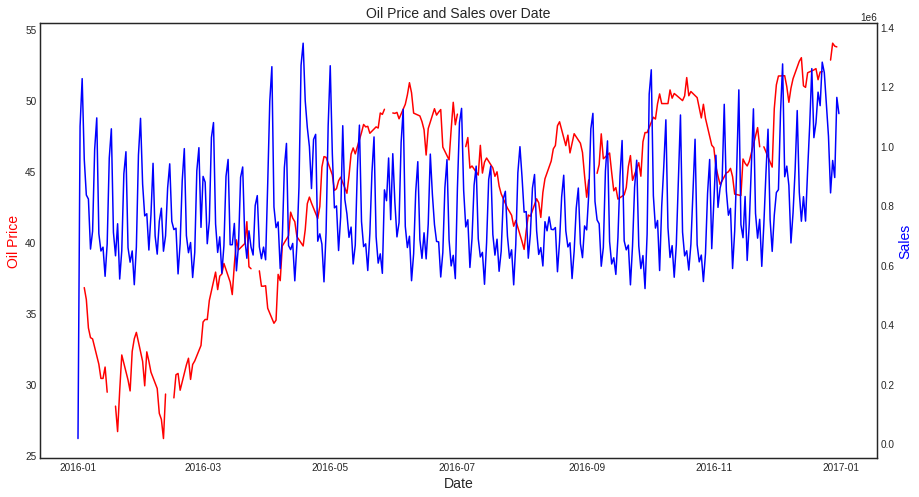

In [82]:
#Plotting date vs oil price(1st y axis) 
fig,ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(df_oil_2016.date, df_oil_2016.dcoilwtico, color="red")

# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Oil Price",color="red",fontsize=14)
ax.figsize=(50,11)

#Plotting date vs unit_sales(2nd y axis) 
ax2=ax.twinx()   # twin object for two different y-axis on the sample plot
ax2.plot(x.date, x.unit_sales,color="blue")  # make a plot with different y-axis using second axis object
ax2.set_ylabel("Sales",color="blue",fontsize=14)
plt.title('Oil Price and Sales over Date',fontsize=14)
plt.show()


* By analyzing the above plot it is hard to interpret any pattern between unit_sales and oil price. i.e. oil price and unit_sales are not ,uch related

### Summary

* Day of Week, Month would also be added as features for sales prediciton. 
* Store Features such as city, state, type, and cluster are important for predicting sales.
* Item Features including family, class, and perishable are also important and would be used for prediction.
* Locale and Type of Holiday/events features can be also be considered.
* Oil price is not much related so it can be discarded.